# Вопрос 1

Методами машинного обучения (нестатистическими тестами) показать, что разбиение на трейн и тест репрезентативно.

## Ответ

Чтобы продемонстрировать, что разбиение данных на обучающую и тестовую выборки отражает общую картину данных, можно использовать следующий подход:

1. Обучаем алгоритмическую модель на текущем разделении и оцениваем ее качество на тестовой выборке. Зафиксируем метрику, например, точность.
2. Затем произведем несколько разных, независимых разбиений исходного набора данных на трейн и тест (при помощи random seed).
3. На каждом новом разбиении снова обучаем ту же модель и оцениваем качество на соответствующем тесте.
4. Сравниваем полученные результаты между собой. Если показатели на тестовых выборках при разных разбиениях примерно одинаковы, значит текущее разделение данных, скорее всего, репрезентативно. Иными словами, если при изменении разбиения общая картина не меняется, можно считать, что изначальное разбиение адекватно отражает свойства данных.

Это не статистический тест в классическом смысле. Это скорее эмпирическая проверка стабильности модели и качества на разных разбиениях. Если результаты стабильны, значит текущее разбиение не содержит систематических искажений, а значит оно репрезентативно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Генерируем синтетику.

In [2]:
X, y = make_classification(n_samples=2000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

Добавляем соль.

In [3]:
random_states = [0, 10, 20, 30, 40, 50]

In [4]:
scores = []

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

In [5]:
print(f'Accuracy scores pool: {scores}')
print(f'Mean accuracy: {np.mean(scores)}, Standart delta: {np.std(scores)}')

Accuracy scores pool: [0.8216666666666667, 0.8583333333333333, 0.8633333333333333, 0.8133333333333334, 0.8433333333333334, 0.855]
Mean accuracy: 0.8424999999999999, Standart delta: 0.01882546541650823


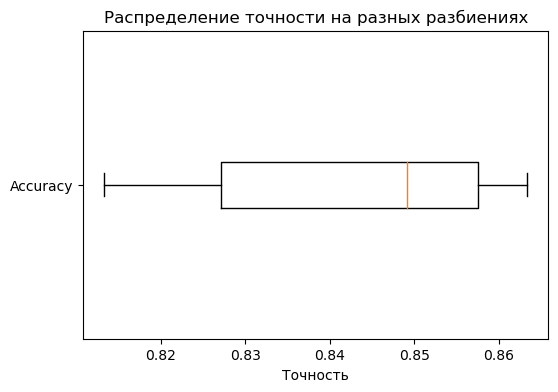

In [6]:
plt.figure(figsize=(6,4))
plt.boxplot(scores, vert=False, labels=['Accuracy'])
plt.title('Распределение точности на разных разбиениях')
plt.xlabel('Точность')
plt.show()

Так как точность на разных разбиениях примерно одинакова (Отклонение `0.01882546541650823`), то вывод: текущее разбиение является репрезентативным, так как модель не чувствительна к конкретному способу разделения.